In [1]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data copy.csv', encoding= 'unicode_escape')

In [3]:
#Prints the shape of the DataFrame (number of rows and columns).
df.shape

(11251, 15)

In [4]:
#Displays the first few rows of the DataFrame.
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
#Provides a summary of the DataFrame, including data types and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values in dataframe
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop those null values
df.dropna(inplace=True)

In [9]:
# change data type of the 'Amount' column to integers.
df['Amount'] = df['Amount'].astype('int')

In [10]:
#Confirm the data type of the 'Amount' column
df['Amount'].dtypes

dtype('int64')

In [11]:
# Lists the column names of the DataFrame.
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
#Provides summary statistics for the entire DataFrame.
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

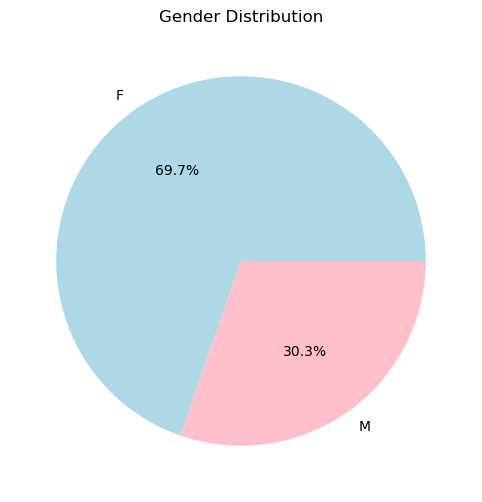

In [73]:
# Plot a pie chart of gender distribution
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


*From above graphs we can see that most of the buyers are females and  purchasing powers of females are greater than men*

### Age

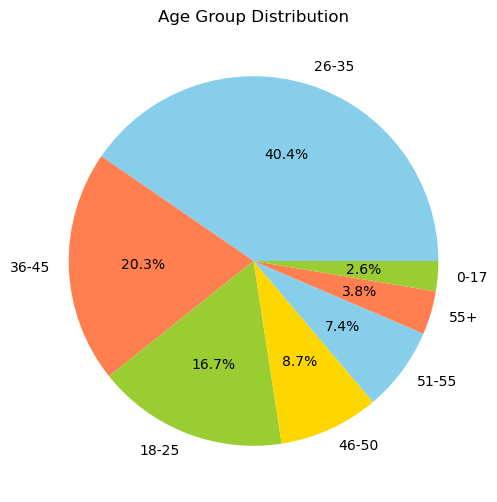

In [16]:
# Plot a pie chart of age group distribution
age_group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(8, 6))
age_group_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'coral', 'yellowgreen', 'gold'])
plt.title('Age Group Distribution')
plt.ylabel('')
plt.show()


*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

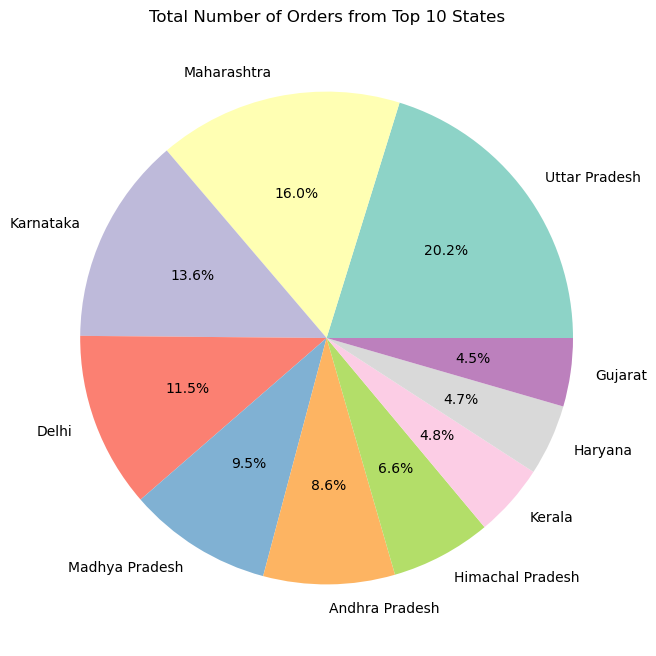

In [75]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Plot a pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sales_state.set_index('State')['Orders'].plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))

# Add a title
plt.title('Total Number of Orders from Top 10 States')

# Remove y-axis label (optional)
plt.ylabel('')

# Show the pie chart
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

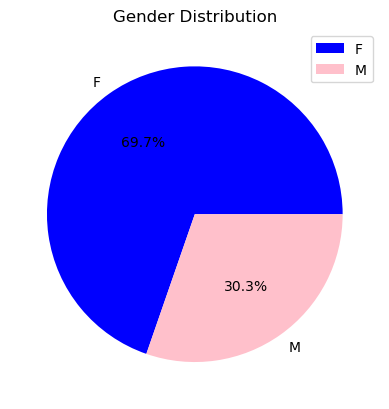

In [18]:
# Define colors for male and female categories
colors = ['blue', 'pink']

# Plot the pie chart with custom colors
gender_counts.plot.pie(autopct='%1.1f%%', colors=colors)

# Add a legend for clarity
plt.legend(labels=gender_counts.index, loc='upper right')

# Add other necessary plot configurations (title, ylabel, etc.)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

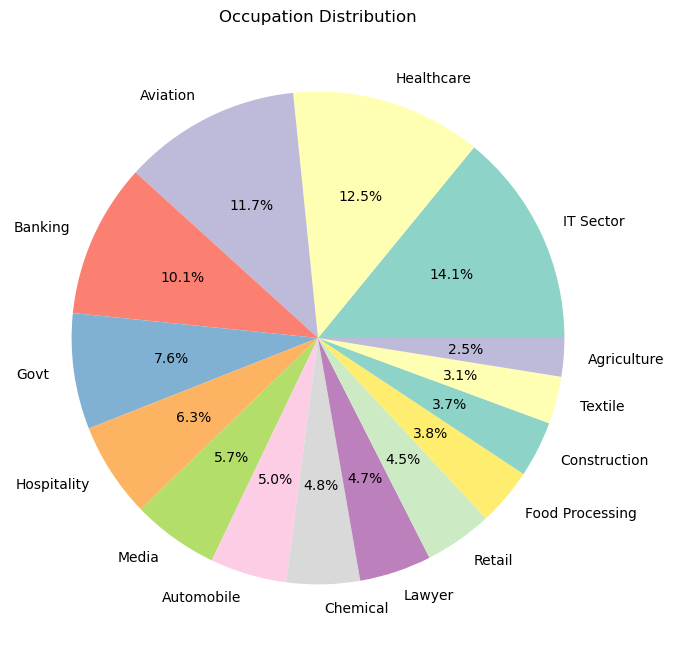

In [19]:
# Plot a pie chart of occupation distribution
occupation_counts = df['Occupation'].value_counts()

plt.figure(figsize=(10, 8))
occupation_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Occupation Distribution')
plt.ylabel('')
plt.show()


*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

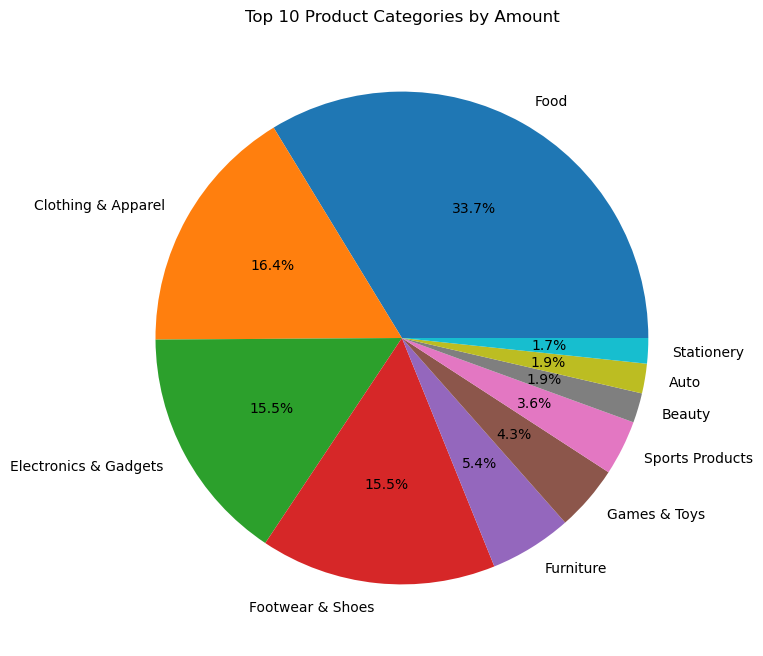

In [20]:
# Calculate the total amount for each product category
top_product_categories = df.groupby('Product_Category')['Amount'].sum().reset_index()

# Select the top 10 product categories based on the total amount
top_product_categories = top_product_categories.sort_values(by='Amount', ascending=False).head(10)

# Plot a pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.pie(top_product_categories['Amount'], labels=top_product_categories['Product_Category'], autopct='%1.1f%%')
plt.title('Top 10 Product Categories by Amount')
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

# Future Analysis


In [21]:
# Selecting relevant columns for the prediction
selected_columns = ['Gender', 'Age Group','State','Occupation','Product_Category'] 
new_df = df[selected_columns].copy()
new_df

,Gender,Age Group,State,Occupation,Product_Category
0,F,26-35,Maharashtra,Healthcare,Auto
1,F,26-35,Andhra Pradesh,Govt,Auto
2,F,26-35,Uttar Pradesh,Automobile,Auto
3,M,0-17,Karnataka,Construction,Auto
4,M,26-35,Gujarat,Food Processing,Auto
...,...,...,...,...,...
11246,M,18-25,Maharashtra,Chemical,Office
11247,M,26-35,Haryana,Healthcare,Veterinary
11248,F,36-45,Madhya Pradesh,Textile,Office
11249,M,36-45,Karnataka,Agriculture,Office


# Processing Occupation!

In [22]:
#Extracting uniques occupation values
Occupation_Categories = new_df['Occupation'].unique()

# Print the list of product categories
print("List of Occupation Categories:")
for occ in Occupation_Categories:
    print(occ)
    
# Print the total number of unique occupations with a custom message
print("total no. of occupations-", len(Occupation_Categories))



List of Occupation Categories:
Healthcare
Govt
Automobile
Construction
Food Processing
Lawyer
Media
Banking
Retail
IT Sector
Aviation
Hospitality
Agriculture
Textile
Chemical
total no. of occupations- 15


In [23]:
# Perform one-hot encoding of 'Occupation'
new_df = pd.get_dummies(new_df, columns=['Occupation'], prefix='Occupation')

In [24]:
new_df

,Gender,Age Group,State,Product_Category,Occupation_Agriculture,Occupation_Automobile,Occupation_Aviation,Occupation_Banking,Occupation_Chemical,Occupation_Construction,Occupation_Food Processing,Occupation_Govt,Occupation_Healthcare,Occupation_Hospitality,Occupation_IT Sector,Occupation_Lawyer,Occupation_Media,Occupation_Retail,Occupation_Textile
0,F,26-35,Maharashtra,Auto,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,F,26-35,Andhra Pradesh,Auto,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,F,26-35,Uttar Pradesh,Auto,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,M,0-17,Karnataka,Auto,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,M,26-35,Gujarat,Auto,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,M,18-25,Maharashtra,Office,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11247,M,26-35,Haryana,Veterinary,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11248,F,36-45,Madhya Pradesh,Office,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11249,M,36-45,Karnataka,Office,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# PROCESSING GENDER 

In [25]:
# Processing "Gender" Column
### Converting M to 0 and F to 1
new_df['Gender'] = new_df['Gender'].map({'M': 0, 'F': 1}) 
new_df

,Gender,Age Group,State,Product_Category,Occupation_Agriculture,Occupation_Automobile,Occupation_Aviation,Occupation_Banking,Occupation_Chemical,Occupation_Construction,Occupation_Food Processing,Occupation_Govt,Occupation_Healthcare,Occupation_Hospitality,Occupation_IT Sector,Occupation_Lawyer,Occupation_Media,Occupation_Retail,Occupation_Textile
0,1,26-35,Maharashtra,Auto,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,26-35,Andhra Pradesh,Auto,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,26-35,Uttar Pradesh,Auto,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0-17,Karnataka,Auto,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,26-35,Gujarat,Auto,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,0,18-25,Maharashtra,Office,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11247,0,26-35,Haryana,Veterinary,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11248,1,36-45,Madhya Pradesh,Office,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11249,0,36-45,Karnataka,Office,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# PROCESSING AGE GROUP

In [26]:
# Prcoessing Age Group Column
Ages_total = new_df['Age Group'].unique()

# Print the list of product categories
print("List of Age Grous:")
for agt in Ages_total:
    print(agt)    
print("total no. of age groups-",(len(Ages_total)))

List of Age Grous:
26-35
0-17
18-25
51-55
46-50
55+
36-45
total no. of age groups- 7


In [27]:
### Trying One Hot Encoding of Age group
new_df = pd.get_dummies(new_df, columns=['Age Group'], prefix='Age_Group')
# Drop the original 'Age Group' column
##new_df = new_df.drop(columns=['Age Group'])
##new_df


In [28]:
for col in new_df: print(col)


Gender
State
Product_Category
Occupation_Agriculture
Occupation_Automobile
Occupation_Aviation
Occupation_Banking
Occupation_Chemical
Occupation_Construction
Occupation_Food Processing
Occupation_Govt
Occupation_Healthcare
Occupation_Hospitality
Occupation_IT Sector
Occupation_Lawyer
Occupation_Media
Occupation_Retail
Occupation_Textile
Age_Group_0-17
Age_Group_18-25
Age_Group_26-35
Age_Group_36-45
Age_Group_46-50
Age_Group_51-55
Age_Group_55+


# PROCESSING STATE

In [29]:
# Processing "State" Column
new_df['State']
States_list = new_df['State'].unique()

# Print the list of product categories
print("List of States:") 
for st in States_list:
    print(st) 
print("Total no. of states-",len(States_list))

List of States:
Maharashtra
Andhra Pradesh
Uttar Pradesh
Karnataka
Gujarat
Himachal Pradesh
Delhi
Jharkhand
Kerala
Haryana
Madhya Pradesh
Bihar
Rajasthan
Uttarakhand
Telangana
Punjab
Total no. of states- 16


In [30]:
# Perform one-hot encoding of 'State'
new_df = pd.get_dummies(new_df, columns=['State'], prefix='State')
new_df
for col in new_df: print(col)


Gender
Product_Category
Occupation_Agriculture
Occupation_Automobile
Occupation_Aviation
Occupation_Banking
Occupation_Chemical
Occupation_Construction
Occupation_Food Processing
Occupation_Govt
Occupation_Healthcare
Occupation_Hospitality
Occupation_IT Sector
Occupation_Lawyer
Occupation_Media
Occupation_Retail
Occupation_Textile
Age_Group_0-17
Age_Group_18-25
Age_Group_26-35
Age_Group_36-45
Age_Group_46-50
Age_Group_51-55
Age_Group_55+
State_Andhra Pradesh
State_Bihar
State_Delhi
State_Gujarat
State_Haryana
State_Himachal Pradesh
State_Jharkhand
State_Karnataka
State_Kerala
State_Madhya Pradesh
State_Maharashtra
State_Punjab
State_Rajasthan
State_Telangana
State_Uttar Pradesh
State_Uttarakhand


In [31]:
import pandas as pd

In [32]:
# df is the DataFrame and 'Product_Category' is the column containing the product categories
# Defining the mapping of categories to groups

category_mapping = {
'Furniture': 'Home_Lifestyle',
'Decor': 'Home_Lifestyle',
'Household items': 'Home_Lifestyle', 'Tupperware': 'Home_Lifestyle',
'Footwear & Shoes': 'Personal_Leisure',
'Clothing & Apparel': 'Personal_Leisure', 'Beauty': 'Personal_Leisure',
'Books': 'stationery',
'Office': 'Staionery',
'Stationery': 'Stationery',
'Games & Toys': 'Personal_Leisure',
'Sports Products': 'Personal_Leisure',
'Electronics & Gadgets': 'Electronics_Essentials', 'Auto': 'Food','Hand & Power Tools': 'Electronics_Essentials', 
'Food': 'Food',
'Pet Care': 'pet_care',
'Veterinary': 'Veterinary_care',

}

# Mapping the categories to groups
new_df['Product_Category_Group'] = new_df['Product_Category'].map(category_mapping)
new_df['Product_Category_Group'].fillna('Others', inplace=True)

# Display the DataFrame with the new 'Product_Category_Group' column
new_df

# Assuming 'final_df' is your DataFrame
final_df = new_df.drop(columns=['Product_Category']) #drop previous column
final_df



,Gender,Occupation_Agriculture,Occupation_Automobile,Occupation_Aviation,Occupation_Banking,Occupation_Chemical,Occupation_Construction,Occupation_Food Processing,Occupation_Govt,Occupation_Healthcare,...,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Telangana,State_Uttar Pradesh,State_Uttarakhand,Product_Category_Group
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,Food
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Food
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Food
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,Food
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Staionery
11247,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Veterinary_care
11248,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Staionery
11249,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Staionery


In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score


In [34]:
# Step 1: Selecting features and target variable
X = final_df.drop(columns=['Product_Category_Group']) # Features (independent variables)
y = final_df['Product_Category_Group'] # Target variable

In [35]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#feature values for training the model
X_train

,Gender,Occupation_Agriculture,Occupation_Automobile,Occupation_Aviation,Occupation_Banking,Occupation_Chemical,Occupation_Construction,Occupation_Food Processing,Occupation_Govt,Occupation_Healthcare,...,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Telangana,State_Uttar Pradesh,State_Uttarakhand
3629,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2996,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4926,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7511,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6057,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5203,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5402,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
872,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
X_test

,Gender,Occupation_Agriculture,Occupation_Automobile,Occupation_Aviation,Occupation_Banking,Occupation_Chemical,Occupation_Construction,Occupation_Food Processing,Occupation_Govt,Occupation_Healthcare,...,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Telangana,State_Uttar Pradesh,State_Uttarakhand
4182,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6977,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
325,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3485,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7690,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6718,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4227,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
y_train

3629                Food
2996    Personal_Leisure
4926    Personal_Leisure
7511    Personal_Leisure
6057                Food
              ...       
5746    Personal_Leisure
5203    Personal_Leisure
5402                Food
872                 Food
7282    Personal_Leisure
Name: Product_Category_Group, Length: 8991, dtype: object

In [39]:
y_test

4182     Electronics_Essentials
6977           Personal_Leisure
325            Personal_Leisure
3485                       Food
7690           Personal_Leisure
                  ...          
1322           Personal_Leisure
10614    Electronics_Essentials
6718           Personal_Leisure
4227     Electronics_Essentials
8787           Personal_Leisure
Name: Product_Category_Group, Length: 2248, dtype: object

In [40]:
# Step 3: Choose a machine learning algorithm and initialize the model
model = RandomForestClassifier(random_state=42) # Example: Random Forest classifier


In [41]:
# Step 4: Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Step 5: Predict the target variable for the testing data
y_pred = model.predict(X_test)


In [43]:
# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 42.704626334519574


In [44]:
# Select all columns except 'Product_Category_Group'
columns_to_convert = final_df.columns[final_df.columns != 'Product_Category_Group']

In [45]:
# Replace True with 1 and False with 0 in selected columns
final_df[columns_to_convert] = final_df[columns_to_convert].astype(int)

In [46]:
final_df.head(50)


,Gender,Occupation_Agriculture,Occupation_Automobile,Occupation_Aviation,Occupation_Banking,Occupation_Chemical,Occupation_Construction,Occupation_Food Processing,Occupation_Govt,Occupation_Healthcare,...,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Telangana,State_Uttar Pradesh,State_Uttarakhand,Product_Category_Group
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,Food
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Food
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Food
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,Food
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Food
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Food
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Food
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,Food
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Food
10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Food


# DecisionTreeClassifier

In [47]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

# Step 1: Split the data into features and target variable
X = final_df.drop(columns=['Product_Category_Group'])
y = final_df['Product_Category_Group']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 4: Train the classifier
dt_classifier.fit(X_train, y_train)

# Step 5: Predict the 'Product_Category_Group' for the testing data
y_pred = dt_classifier.predict(X_test)

# Step 6: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred) 
print("Decision Tree Accuracy:", accuracy*100)


Decision Tree Accuracy: 41.72597864768684


# KNN

In [78]:
# from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# Step 1: Split the data into features and target variable
X = final_df.drop(columns=['Product_Category_Group'])
y = final_df['Product_Category_Group']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10) # You can adjust the number of neighbors (k) as needed

# Step 4: Train the classifier
knn_classifier.fit(X_train, y_train)

# Step 5: Predict the 'Product_Category_Group' for the testing data
y_pred = knn_classifier.predict(X_test)

# Step 6: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred) 
print("KNN Accuracy:", accuracy*100)


KNN Accuracy: 44.661921708185055


# Random Forest 

In [79]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Assuming X and y are your features and target variable
X = final_df.drop(columns=['Product_Category_Group']) # Features y = final_df['Product_Category_Group'] # Target variable

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42) # Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Train the model on the resampled data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 61.98610636601754


In [80]:
for col in final_df:
    print(col)

Gender
Occupation_Agriculture
Occupation_Automobile
Occupation_Aviation
Occupation_Banking
Occupation_Chemical
Occupation_Construction
Occupation_Food Processing
Occupation_Govt
Occupation_Healthcare
Occupation_Hospitality
Occupation_IT Sector
Occupation_Lawyer
Occupation_Media
Occupation_Retail
Occupation_Textile
Age_Group_0-17
Age_Group_18-25
Age_Group_26-35
Age_Group_36-45
Age_Group_46-50
Age_Group_51-55
Age_Group_55+
State_Andhra Pradesh
State_Bihar
State_Delhi
State_Gujarat
State_Haryana
State_Himachal Pradesh
State_Jharkhand
State_Karnataka
State_Kerala
State_Madhya Pradesh
State_Maharashtra
State_Punjab
State_Rajasthan
State_Telangana
State_Uttar Pradesh
State_Uttarakhand
Product_Category_Group


In [81]:
final_df['State_Andhra\xa0Pradesh']


0        0
1        1
2        0
3        0
4        0
        ..
11246    0
11247    0
11248    0
11249    0
11250    0
Name: State_Andhra Pradesh, Length: 11239, dtype: int64

In [82]:
final_df['State_Madhya Pradesh']


0        0
1        0
2        0
3        0
4        0
        ..
11246    0
11247    0
11248    1
11249    0
11250    0
Name: State_Madhya Pradesh, Length: 11239, dtype: int64

In [83]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Initialize the trained RandomForestClassifier (rf_classifier) # Assuming rf_classifier is already trained
# Define the columns for the DataFrame
columns = ['Gender','Occupation_Agriculture', 'Occupation_Automobile', 'Occupation_Aviation', 'Occupation_Banking',
           'Occupation_Chemical', 'Occupation_Construction', 'Occupation_Food Processing',
           'Occupation_Govt', 'Occupation_Healthcare', 'Occupation_Hospitality', 'Occupation_IT Sector',
           'Occupation_Lawyer', 'Occupation_Media', 'Occupation_Retail', 'Occupation_Textile','Age_Group_0-17', 'Age_Group_18-25', 'Age_Group_26-35',
'Age_Group_36-45', 'Age_Group_46-50', 'Age_Group_51-55', 'Age_Group_55+',
'State_Andhra\xa0Pradesh', 'State_Bihar', 'State_Delhi', 'State_Gujarat', 'State_Haryana',
'State_Himachal Pradesh', 'State_Jharkhand', 'State_Karnataka', 'State_Kerala',
'State_Madhya Pradesh', 'State_Maharashtra', 'State_Punjab', 'State_Rajasthan',
'State_Telangana', 'State_Uttar Pradesh', 'State_Uttarakhand'] # Initialize an empty dictionary to store user inputs

user_inputs = {}
# Ask the user for input for Gender and Marital_Status
for col in ['Gender']:
    user_input = input(f"Enter 1 if {col} is applicable(1 for Female and 0 for Men: ") 
user_inputs[col] = int(user_input)
# Ask the user to choose one Age_Group from the list
print("Choose one Age Group from the list:") 
print("1. 0-17")
print("2. 18-25")
print("3. 26-35")
print("4. 36-45")
print("5. 46-50")
print("6. 51-55")
print("7. 55+")

age_choice = input("Enter the number corresponding to your choice: ") 
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
selected_age_group = age_groups[int(age_choice) - 1]

for col in columns:
    if col.startswith('Age_Group_'):
        user_inputs[col] = 1 if col == f'Age_Group_{selected_age_group}'else 0
        
# Ask the user to choose one Occupation from the list
occupation_choice = input("Choose one Occupation from the list (e.g., Healthcare, Automobile, etc.): ")
for col in columns:
    if col.startswith('Occupation_'):
        user_inputs[col] = 1 if col == f'Occupation_{occupation_choice}' else 0

# Ask the user to choose one State from the list
state_choice = input("Choose one State from the list (e.g., Maharashtra, Gujarat, etc.): ")

for col in columns:
    if col.startswith('State_'):
        user_inputs[col] = 1 if col == f'State_{state_choice}' else 0

# Create a DataFrame from the user inputs
user_df = pd.DataFrame([user_inputs], columns=columns)

# Predict the Product_Category_Group using the trained model
predicted_category = rf_classifier.predict(user_df)

# Print the predicted Product_Category_Group
print("********************************************") 
print("Predicted Product_Category_Group: \n", predicted_category[0])




Enter 1 if Gender is applicable(1 for Female and 0 for Men: 1
Choose one Age Group from the list:
1. 0-17
2. 18-25
3. 26-35
4. 36-45
5. 46-50
6. 51-55
7. 55+
Enter the number corresponding to your choice: 1
Choose one Occupation from the list (e.g., Healthcare, Automobile, etc.): Healthcare
Choose one State from the list (e.g., Maharashtra, Gujarat, etc.): Maharashtra
********************************************
Predicted Product_Category_Group: 
 Home_Lifestyle
